In [8]:
import torch
from torch.autograd import Variable
import numpy as np
import torch.nn.init as init

In [9]:
# input => 7, hidd=> 6, out=> 1

dtype = torch.FloatTensor
input_size, hidden_size, output_size = 7, 6, 1

epochs = 300
seq_length = 20
lr = 0.1
data_time_steps = np.linspace(2, 10, seq_length + 1)
data = np.sin(data_time_steps)
data.resize((seq_length + 1, 1))

x = Variable(torch.Tensor(np.array(data[:-1])), requires_grad=False).type(dtype)
y = Variable(torch.Tensor(np.array(data[1:])), requires_grad=False).type(dtype)

In [10]:
w1 = torch.FloatTensor(input_size, hidden_size).type(dtype)
init.normal(w1,0.0,0.4 )
w1 = Variable(w1, requires_grad=True)
w2 = torch.FloatTensor(hidden_size, output_size).type(dtype)
init.normal(w2,0.0,0.3)
w2 = Variable(w2, requires_grad=True)

/tmp/ipython-input-10-1925692975.py:2: FutureWarning: `nn.init.normal` is now deprecated in favor of `nn.init.normal_`.
  init.normal(w1,0.0,0.4 )
/tmp/ipython-input-10-1925692975.py:5: FutureWarning: `nn.init.normal` is now deprecated in favor of `nn.init.normal_`.
  init.normal(w2,0.0,0.3)


In [11]:
def forward(input, context_state, w1, w2):
  xh = torch.cat((input, context_state), 1)
  context_state = torch.tanh(xh.mm(w1))
  out = context_state.mm(w2)
  return (out, context_state)

In [12]:
for i in range(epochs):
  total_loss =0
  context_state = Variable(torch.zeros(1, hidden_size).type(dtype), requires_grad=True)
  for j in range(x.size(0)):
    input = x[j:(j+1)]
    target = y[j:(j+1)]
    (pred, context_state) = forward(input, context_state, w1, w2)
    loss = torch.pow(pred - target, 2) # (pred -target).pow(2).sum()/2
    total_loss += loss
    loss.backward()
    w1.data -= lr * w1.grad.data
    w2.data -= lr * w2.grad.data
    w1.grad.data.zero_()
    w2.grad.data.zero_()
    context_state = Variable(context_state.data)
  if i % 10 == 0:
    print("Epoch: {} loss {}".format(i, total_loss.data))
context_state = Variable(torch.zeros(1, hidden_size).type(dtype), requires_grad=False)
prediction = []

for i in range(x.size(0)):
  input = x[i:(i+1)]
  (pred, context_state) = forward(input, context_state, w1, w2)
  context_state = Variable(context_state.data)
  prediction.append(pred.data.numpy().ravel()[0])


Epoch: 0 loss tensor([[3.8006]])
Epoch: 10 loss tensor([[0.5191]])
Epoch: 20 loss tensor([[0.4248]])
Epoch: 30 loss tensor([[0.3688]])
Epoch: 40 loss tensor([[0.3356]])
Epoch: 50 loss tensor([[0.3329]])
Epoch: 60 loss tensor([[0.3576]])
Epoch: 70 loss tensor([[0.3917]])
Epoch: 80 loss tensor([[0.4157]])
Epoch: 90 loss tensor([[0.4292]])
Epoch: 100 loss tensor([[0.4361]])
Epoch: 110 loss tensor([[0.4354]])
Epoch: 120 loss tensor([[0.4404]])
Epoch: 130 loss tensor([[0.4920]])
Epoch: 140 loss tensor([[0.6552]])
Epoch: 150 loss tensor([[0.5929]])
Epoch: 160 loss tensor([[0.5065]])
Epoch: 170 loss tensor([[0.3869]])
Epoch: 180 loss tensor([[0.2565]])
Epoch: 190 loss tensor([[0.1464]])
Epoch: 200 loss tensor([[0.0757]])
Epoch: 210 loss tensor([[0.0415]])
Epoch: 220 loss tensor([[0.0302]])
Epoch: 230 loss tensor([[0.0269]])
Epoch: 240 loss tensor([[0.0249]])
Epoch: 250 loss tensor([[0.0230]])
Epoch: 260 loss tensor([[0.0212]])
Epoch: 270 loss tensor([[0.0195]])
Epoch: 280 loss tensor([[0.0180

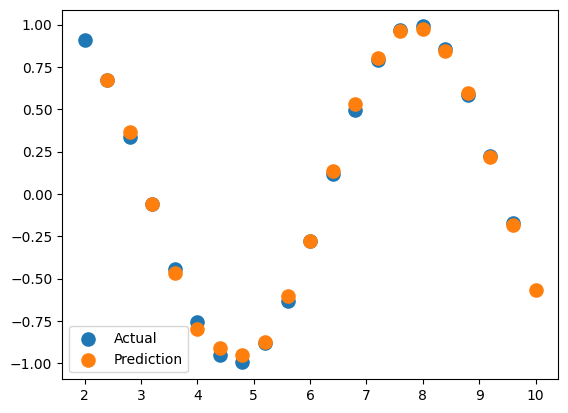

In [13]:
import matplotlib.pyplot as plt

plt.scatter(data_time_steps[:-1], x.data.numpy(),s=90, label = 'Actual')
plt.scatter(data_time_steps[1:], prediction, s=90, label = 'Prediction')
plt.legend()
plt.show()